In [223]:
import numpy
#scipy.special for the sigmoid function expit()
import scipy.special

import matplotlib.pyplot
%matplotlib inline

In [224]:
#ok, let's attempt to attack the same model

import csv
import random

# set the random seed for reproducibility
random.seed(42)

# read in the CSV file
with open('/Users/timnelson/Desktop/mnist_dataset/mnist_test.csv', 'r') as infile:
    reader = csv.reader(infile)
    data = [row for row in reader]

# add random noise to the data
for i in range(len(data)):
    for j in range(len(data[i])):
        data[i][j] = float(data[i][j]) + random.uniform(-10, 10)

# write the modified data to a new CSV file
with open('desktop/mnist_dataset/mnist_test_noise.csv', 'w', newline='') as outfile:
    writer = csv.writer(outfile)
    writer.writerows(data)

In [225]:
#framework documentation
#neural network class definition
#class neuralNetwork:
    #initialize the neural network
    #def __init__():
        #pass
    #train the neural network
    #def train():
        #pass
    #query the neural network
    #def query():
        #pass

In [226]:
class neuralNetwork:
    #initialize the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes,
              learningrate):
        #set the number of nodes in each input, hidden, and output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        #link weight matrices, wih and who
        #weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        #w11 w21
        #w12 w 22 etc
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))
        
        #learning rate
        self.lr = learningrate
        
        #activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass
    
    #train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass
    
    #query the neural network - takes the input and returns the network's output
    def query(self, inputs_list):
        #convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        #calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        #calculate signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        #calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        #calculate signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [227]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 50

# learning rate
learning_rate = 0.1

# create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

In [228]:
#load MNIST training dataset
training_data_file = open ("desktop/mnist_dataset/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [229]:
# train the neural network
epochs = 5

for e in range(epochs):
    # go through all records in the training data set
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        # modify the network to accept noise by rounding the label to the nearest integer before converting to an int value
        target_label = int(round(float(all_values[0])))
        targets[target_label] = 0.99
        n.train(inputs, targets)
        pass
    pass

In [230]:
# load the MNIST test data
test_data_file = open("desktop/mnist_dataset/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

7


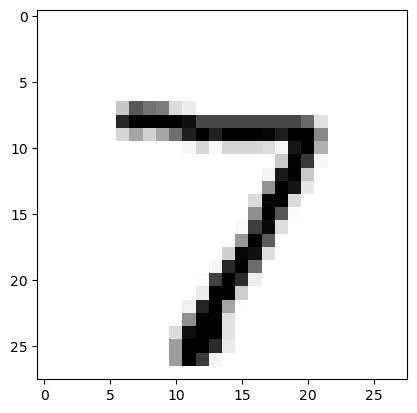

In [231]:
#get the first test record from the standard training set
all_values = test_data_list[0].split(',')
print(all_values[0])
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

In [232]:
n.query((numpy.asfarray(all_values[1:]) / 255.0 *0.99) +0.01)

array([[8.94310181e-03],
       [1.73069580e-03],
       [2.49569414e-03],
       [1.73598560e-03],
       [6.74818534e-04],
       [4.56905550e-03],
       [2.97005873e-03],
       [9.70547725e-01],
       [1.62950143e-02],
       [2.42850546e-03],
       [7.78784591e-03],
       [1.02892452e-02],
       [8.77925322e-03],
       [9.63441044e-03],
       [9.31144194e-03],
       [9.70910735e-03],
       [1.02481470e-02],
       [8.92806903e-03],
       [9.34325475e-03],
       [1.10657335e-02],
       [6.65637964e-03],
       [8.27153083e-03],
       [8.57689208e-03],
       [9.32145588e-03],
       [9.51256570e-03],
       [9.73639078e-03],
       [9.37327558e-03],
       [1.04849684e-02],
       [8.93644629e-03],
       [1.05165852e-02],
       [1.06472984e-02],
       [9.47575119e-03],
       [9.91824702e-03],
       [9.16345077e-03],
       [8.67722428e-03],
       [8.87825417e-03],
       [1.02007572e-02],
       [8.76005443e-03],
       [9.78798341e-03],
       [1.04620468e-02],


In [233]:
# test the neural network

# scorecard for how well the network performs, initially empty
scorecard = []

# go through all the records in the test data set
for record in test_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(round(float(all_values[0])))
    # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # query the network
    outputs = n.query(inputs)
    # the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    # append correct or incorrect to list
    if (label == correct_label):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        # network answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
    
    pass

In [234]:
# calculate the performance score, the fraction of correct answers
scorecard_array = numpy.asarray(scorecard)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.9708


9.788535969157675


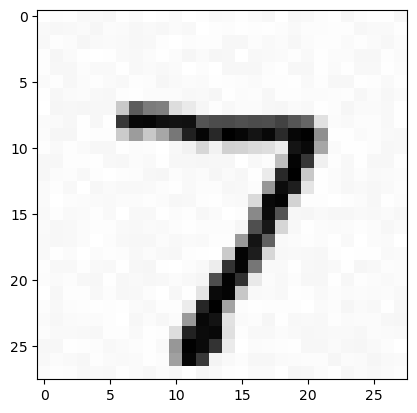

In [235]:
# load the MNIST test attack data
test_data_file_noise = open("desktop/mnist_dataset/mnist_test_noise.csv", 'r')
test_data_list_noise = test_data_file_noise.readlines()
test_data_file_noise.close()
#get the first test record from the standard training set
all_values_noise = test_data_list_noise[0].split(',')
print(all_values_noise[0])
image_array = numpy.asfarray(all_values_noise[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')